<a href="https://colab.research.google.com/github/Saurav-Raghaw/Optimization/blob/main/Experiment_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Novel PID version_2 and Comparison with others.

*   Only accumulating the update history on look_ahead not on its gradient.

In [1]:
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
import numpy as np

In [2]:

def func(x1, x2):
  return 0.1*x1**2 + 2*x2**2

In [3]:
def grad_func_x1(x1):
  return 0.2*x1

In [4]:
def grad_func_x2(x2):
  return 4*x2

#Novel PID2:
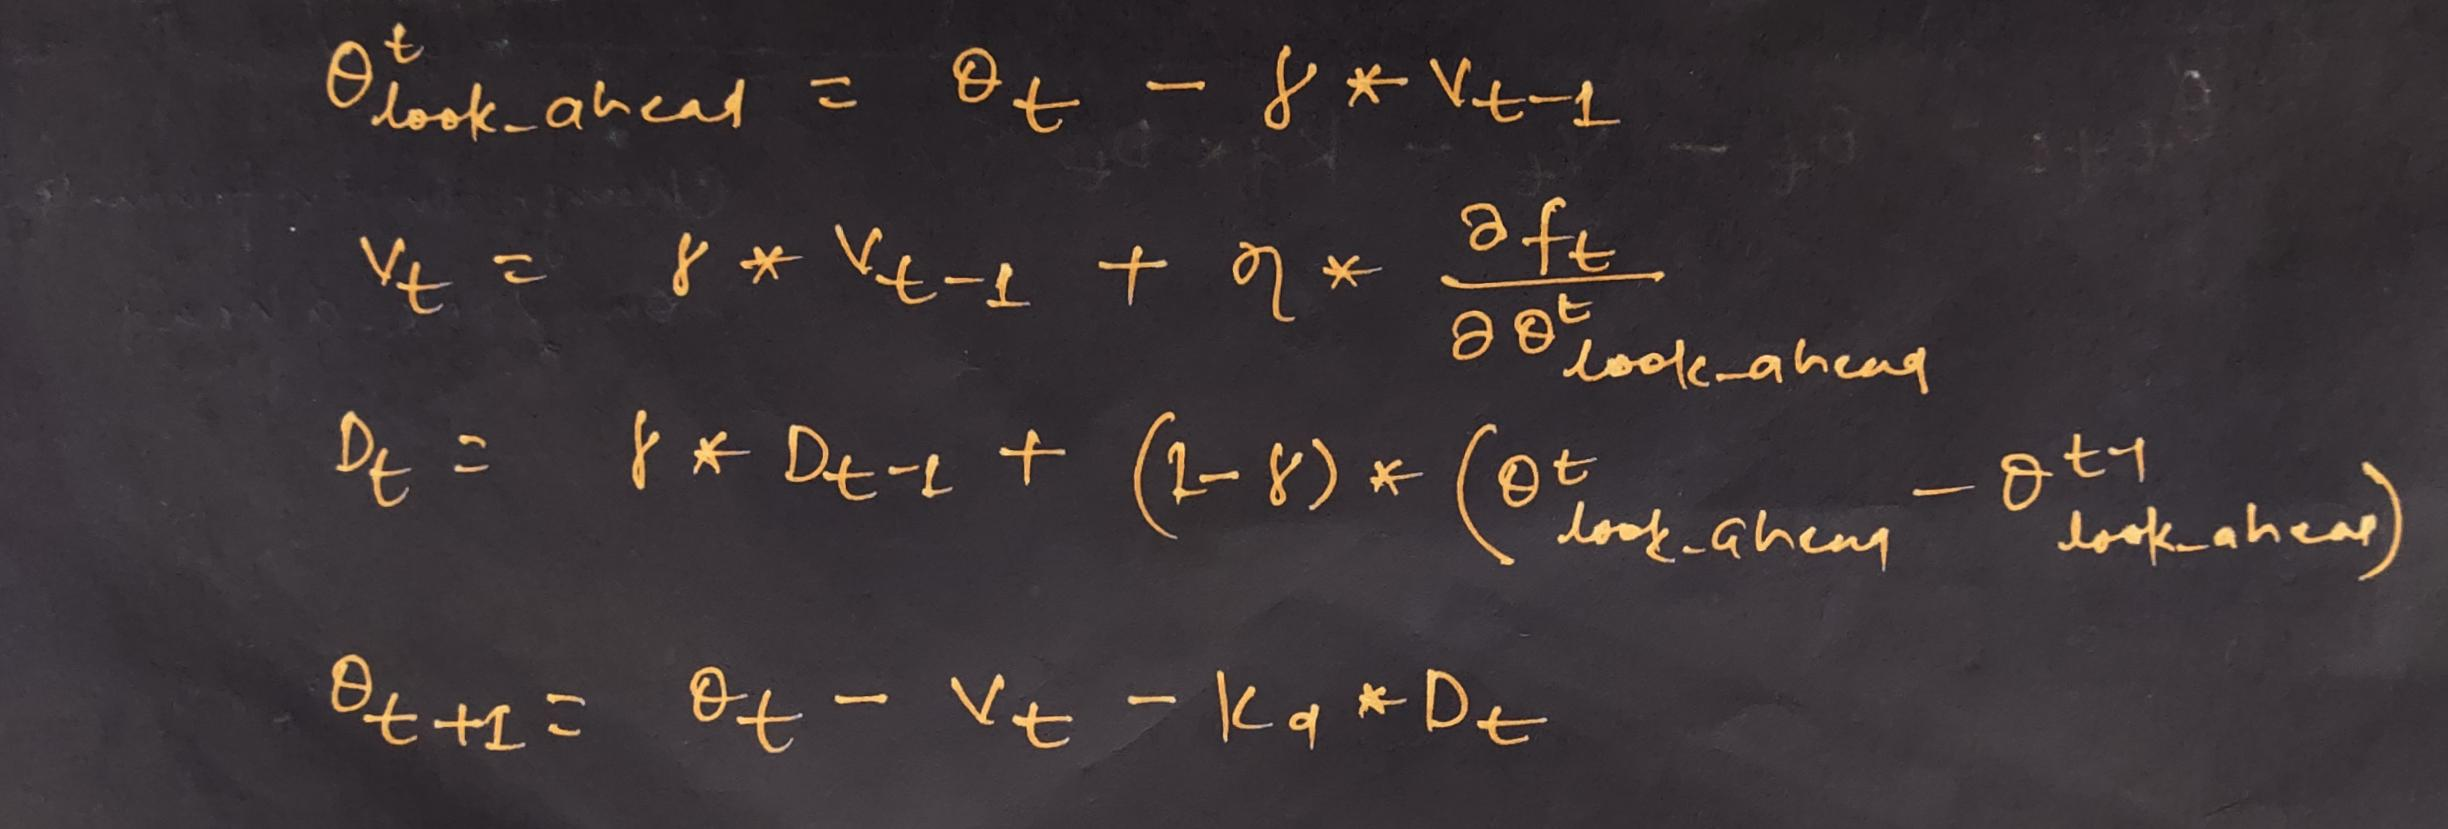

In [5]:
def novel_PID_v2(lr=0.05, Kd=0.9):
  x1, x2 = -10, -10 # parameters
  log = []  #list to store the value of x1 and x2 i.e learning 

  gamma =0.9 # momentum parameter
  eps = 1e-8

  prev_x1, prev_x2 = x1, x2
  grad_x1, grad_x2 = 0,0
  vt_x1, dt_x1, vt_x2, dt_x2 = 0,0,0,0

  prev_grad_x1, prev_grad_x2 = 0,0
  prev_vt_x1, prev_vt_x2, prev_dt_x1, prev_dt_x2 =0,0,0,0

  x1_look_ahead, x2_look_ahead = 0,0
  prev_x1_look_ahead, prev_x2_look_ahead = 0,0

  t = 0

  while(1):
    t+=1

    x1_look_ahead = x1 - gamma*prev_vt_x1
    x2_look_ahead = x2 - gamma*prev_vt_x2

    grad_x1 = grad_func_x1(x1_look_ahead)
    grad_x2 = grad_func_x2(x2_look_ahead)

    vt_x1 = gamma*prev_vt_x1 + (lr*grad_x1)
    vt_x2 = gamma*prev_vt_x2 + (lr*grad_x2)

    dt_x1 = gamma*prev_dt_x1 + (1-gamma)*(x1_look_ahead - prev_x1_look_ahead)
    dt_x2 = gamma*prev_dt_x2 + (1-gamma)*(x2_look_ahead - prev_x2_look_ahead)

    prev_grad_x1 = grad_x1
    prev_grad_x2 = grad_x2

    prev_vt_x1 = vt_x1
    prev_vt_x2 = vt_x2

    prev_x1_look_ahead = x1_look_ahead
    prev_x2_look_ahead = x2_look_ahead

    prev_dt_x1 = dt_x1
    prev_dt_x2 = dt_x2

    prev_x1 = x1
    prev_x2 = x2

    log.append((x1, x2))

    x1 = x1 - vt_x1 - Kd*dt_x1
    x2 = x2 - vt_x2 - Kd*dt_x2

    if(x1 == prev_x1 and x2 == prev_x2):
      break

  return x1, x2, log

#Different:Kd

In [40]:
#x1, x2, log_1 = novel_PID_v2(lr=0.1, Kd=10) #Larger overshoots
x1, x2, log_1 = novel_PID_v2(lr=0.01, Kd=10) 
x1, x2, log_2 = novel_PID_v2(lr=0.01, Kd=9)
x1, x2, log_3 = novel_PID_v2(lr=0.01, Kd=8)
x1, x2, log_4 = novel_PID_v2(lr=0.01, Kd=7)
x1, x2, log_5 = novel_PID_v2(lr=0.01, Kd=6)
x1, x2, log_6 = novel_PID_v2(lr=0.01, Kd=5)
x1, x2, log_7 = novel_PID_v2(lr=0.01, Kd=3)
x1, x2, log_8 = novel_PID_v2(lr=0.01, Kd=1)
x1, x2, log_9 = novel_PID_v2(lr=0.01, Kd=0.9)
x1, x2, log_10 = novel_PID_v2(lr=0.01, Kd=0.5)

'''Will try on different Learning rate and will try to implement Adaptive in this case'''
''' Significant changes are observing when learning rate is small'''

' Significant changes are observing when learning rate is small'

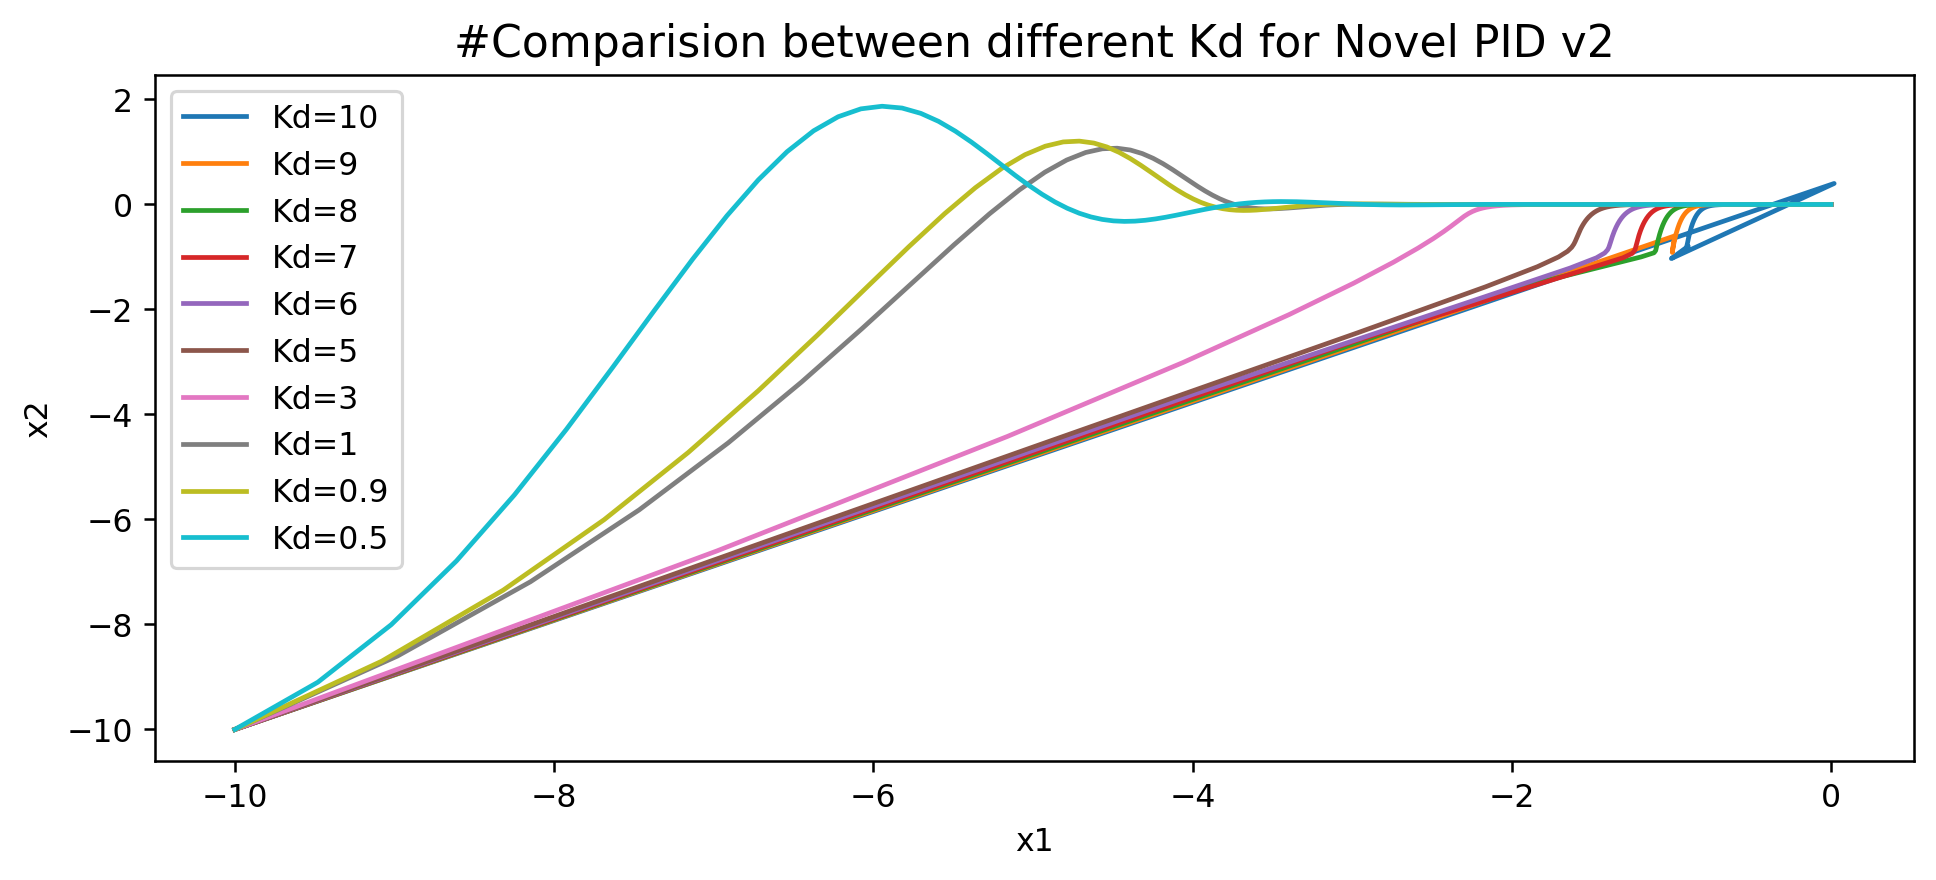

CPU times: user 4.33 s, sys: 45.8 ms, total: 4.38 s
Wall time: 4.38 s


In [41]:
%%time
x_1 = [l[0] for l in log_1]
y_1 = [l[1] for l in log_1]

x_2 = [l[0] for l in log_2]
y_2 = [l[1] for l in log_2]

x_3 = [l[0] for l in log_3]
y_3 = [l[1] for l in log_3]

x_4 = [l[0] for l in log_4]
y_4 = [l[1] for l in log_4]

x_5 = [l[0] for l in log_5]
y_5 = [l[1] for l in log_5]

x_6 = [l[0] for l in log_6]
y_6 = [l[1] for l in log_6]

x_7 = [l[0] for l in log_7]
y_7 = [l[1] for l in log_7]

x_8 = [l[0] for l in log_8]
y_8 = [l[1] for l in log_8]

x_9 = [l[0] for l in log_9]
y_9 = [l[1] for l in log_9]

x_10 = [l[0] for l in log_10]
y_10 = [l[1] for l in log_10]


plt.figure(figsize=(10,4))
plt.rcParams['figure.dpi'] = 227

plt.title('#Comparision between different Kd for Novel PID v2', fontSize=14)
plt.xlabel('x1')
plt.ylabel('x2')

plt.plot(x_1,y_1, label='Kd=10')
plt.plot(x_2,y_2, label='Kd=9')
plt.plot(x_3,y_3, label='Kd=8')
plt.plot(x_4,y_4, label='Kd=7')
plt.plot(x_5,y_5, label='Kd=6')
plt.plot(x_6,y_6, label='Kd=5')
plt.plot(x_7,y_7, label='Kd=3')
plt.plot(x_8,y_8, label='Kd=1')
plt.plot(x_9,y_9, label='Kd=0.9')
plt.plot(x_10,y_10, label='Kd=0.5')

plt.legend()
plt.show()

#Conclusion:


*   When Kd is large overshoots the target.
*   Larger oscillation for smaller value of Kd.

